# Introduction to Seaborn

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Distplot

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

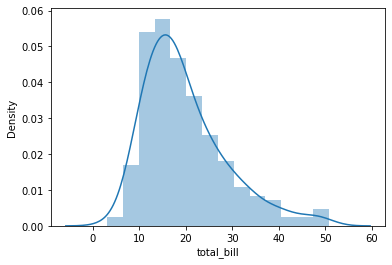

In [7]:
sns.distplot(tips['total_bill'])

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

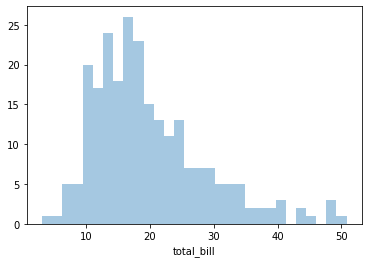

In [8]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

### jointplot
Allows you to match up two distribution plots for bivariate data
* Choice of what kind parameter to compare with - scatter, reg, resid, kde, hex

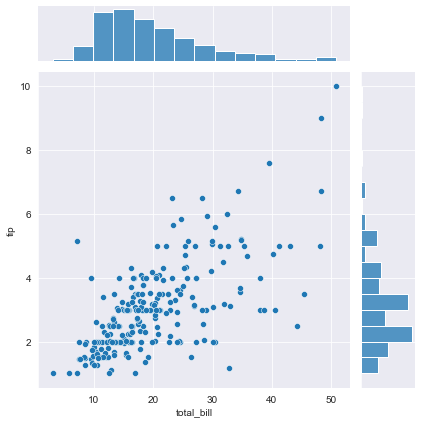

In [12]:
sns.set_style('darkgrid')
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

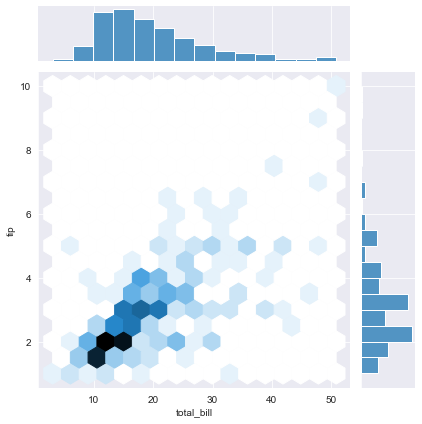

In [13]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

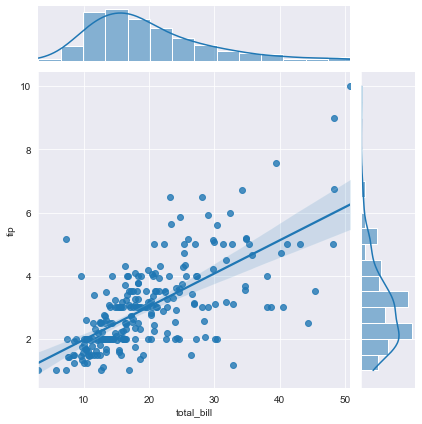

In [14]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

### Pairplot
Plots pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument for categorical columns

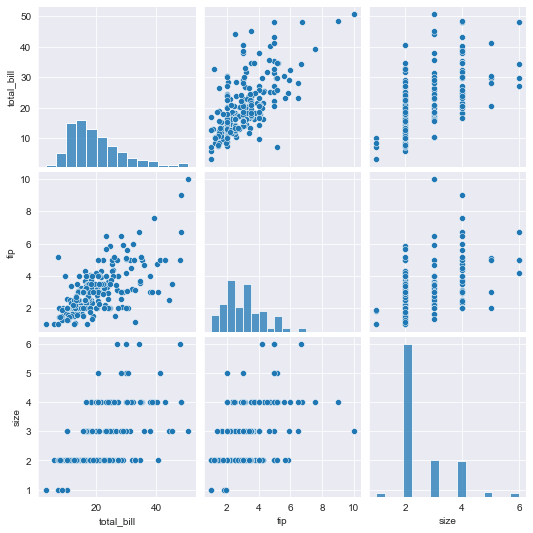

In [15]:
sns.pairplot(tips)

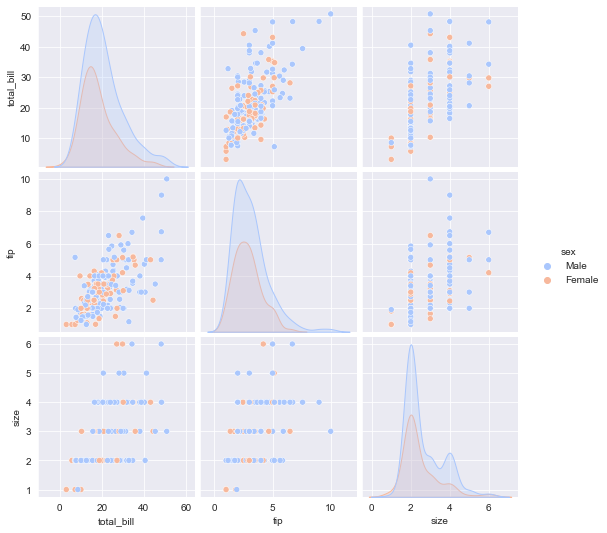

In [16]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

### Rugplot
Dash mark for univariate distribution
* Building block for KDE plot

<AxesSubplot:xlabel='total_bill'>

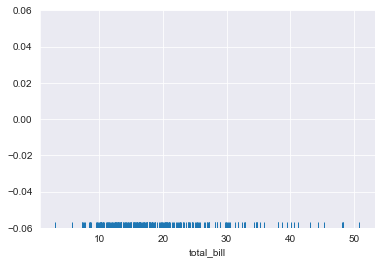

In [17]:
sns.rugplot(tips['total_bill'])

### kde plot
kdeplots are kernel density estimation plots. These replace every single observation with a gaussian (normal distribution) centered around that value

(0.0, 1.0)

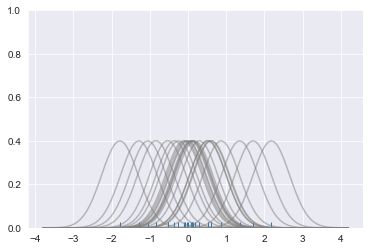

In [18]:
from scipy import stats

dataset = np.random.randn(25)
sns.rugplot(dataset)

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

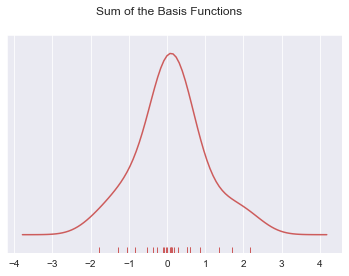

In [19]:
#To get the KDE plot, we sum these basis functions
# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

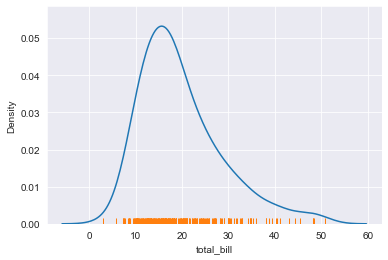

In [20]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

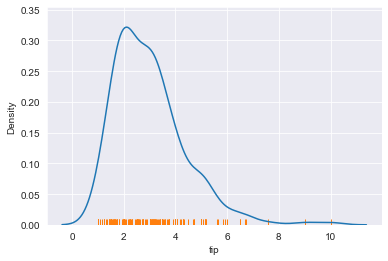

In [21]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

## Categorical Plots
Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [22]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Barplot and countplot
Aggregate data off a categorical feature. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

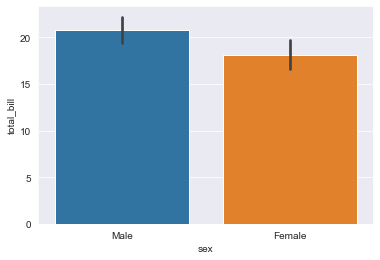

In [23]:
sns.barplot(x='sex', y='total_bill', data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

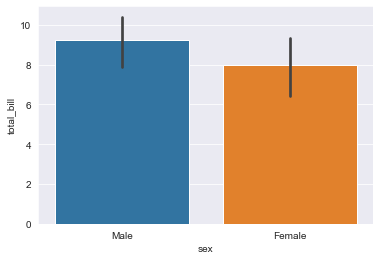

In [24]:
# you can change the estimator object to your own function (that converts a vector to a scalar)
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

### Countplot 
Essentially the same as the barplot, but estimator explicitly counts number of occurrences.

<AxesSubplot:xlabel='sex', ylabel='count'>

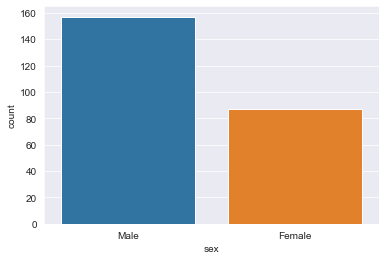

In [25]:
sns.countplot(x='sex', data=tips)

### Boxplot
boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

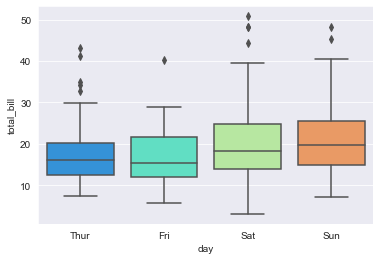

In [26]:
sns.boxplot(x='day', y='total_bill', data=tips, palette='rainbow')

<AxesSubplot:>

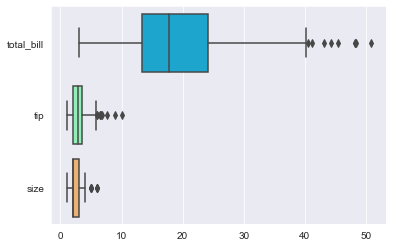

In [27]:
# can do an entire dataframe with orient='h'
sns.boxplot(data=tips, palette='rainbow', orient='h')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

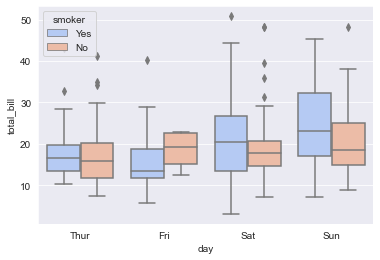

In [28]:
# add hue for additional layer of data
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips, palette='coolwarm')

### Violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

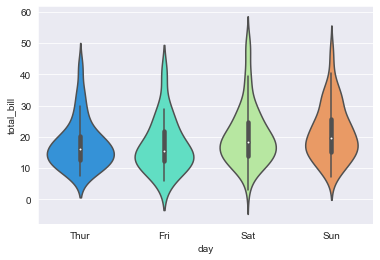

In [29]:
sns.violinplot(x='day', y='total_bill', data=tips, palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

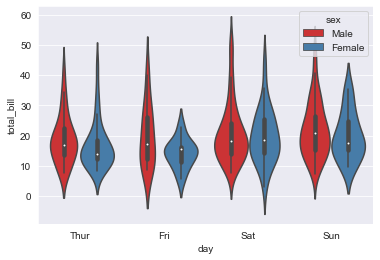

In [30]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

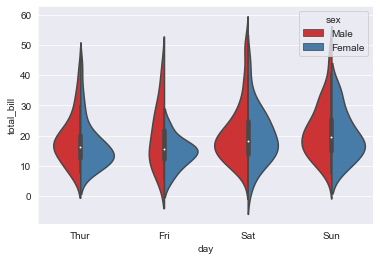

In [33]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<AxesSubplot:xlabel='day', ylabel='total_bill'>

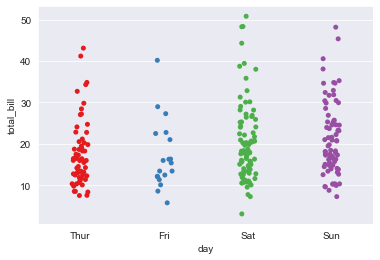

In [38]:
sns.stripplot(x='day', y='total_bill', data=tips, palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

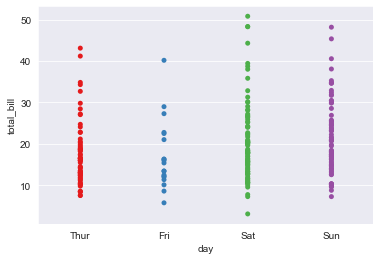

In [39]:
sns.stripplot(x='day', y='total_bill', data=tips,  jitter=False, palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

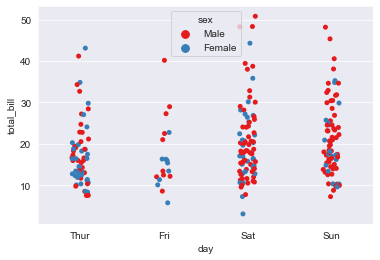

In [40]:
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', palette='Set1')

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

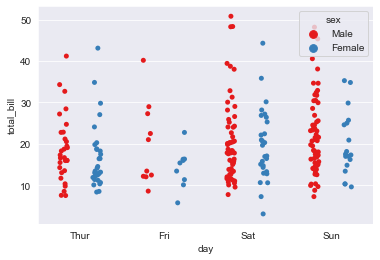

In [37]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

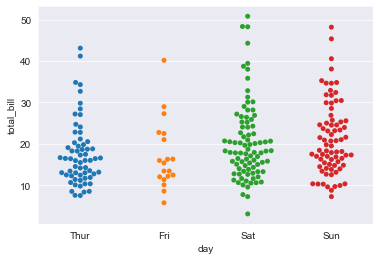

In [41]:
sns.swarmplot(x="day", y="total_bill", data=tips)

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

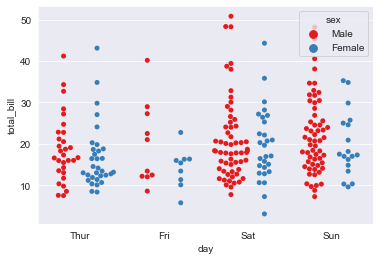

In [42]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

<AxesSubplot:xlabel='tip', ylabel='day'>

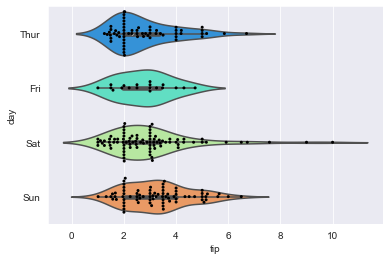

In [43]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

### Catplot
The most general form of a categorical plot

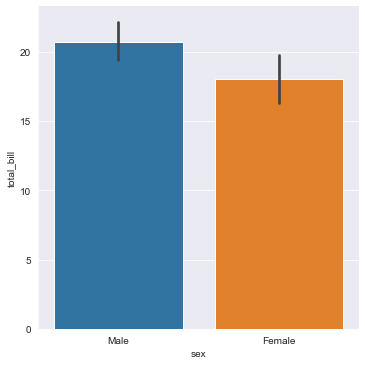

In [45]:
sns.catplot(x='sex', y='total_bill', data=tips, kind='bar')

## Heatmaps and Matrix Plots

In [46]:
flights = sns.load_dataset('flights')

### Heatmap
In order for a heatmap to work properly, your data must already be in matrix form

In [47]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

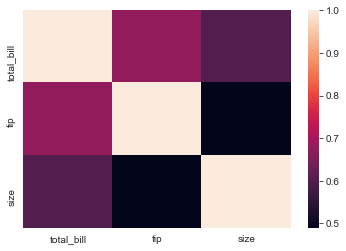

In [48]:
sns.heatmap(tips.corr())

<AxesSubplot:>

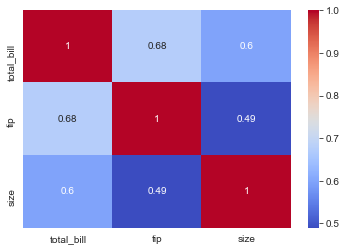

In [49]:
sns.heatmap(tips.corr(), cmap='coolwarm', annot=True)

In [50]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [54]:
fp = flights.pivot_table(values='passengers', index='month', columns='year')

In [55]:
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

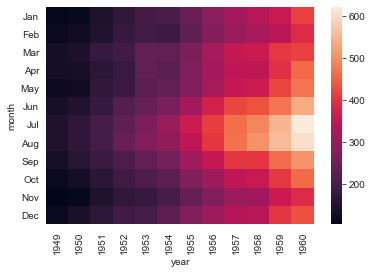

In [56]:
sns.heatmap(fv)

<AxesSubplot:xlabel='year', ylabel='month'>

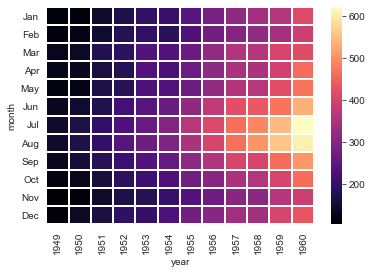

In [58]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1)

### clustermap
Hierarchial clustering

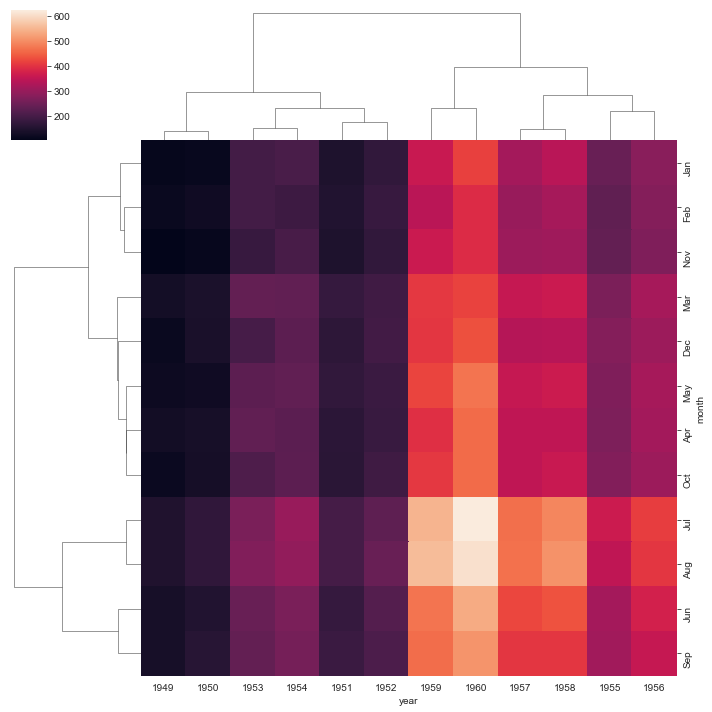

In [60]:
sns.clustermap(fp)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

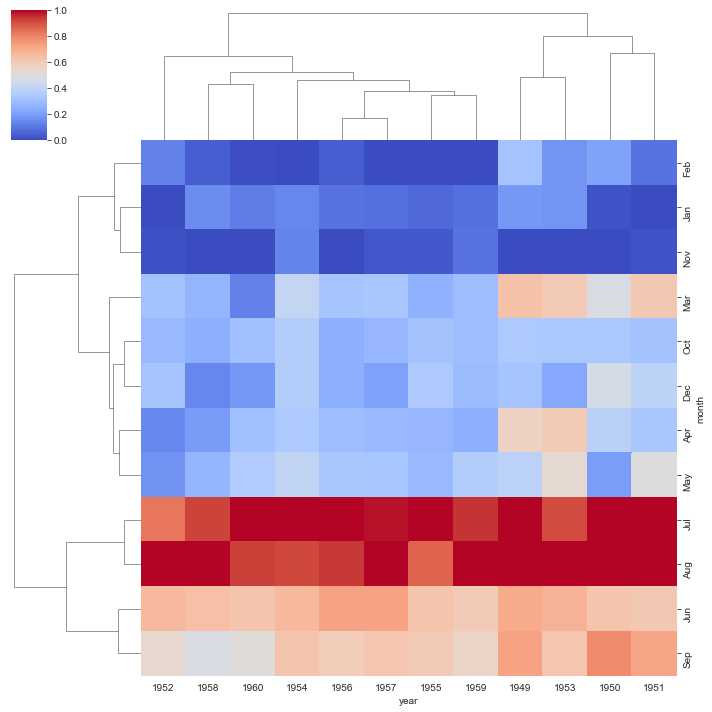

In [62]:
# More options to get the information a little clearer like normalization
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

## Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [63]:
iris = sns.load_dataset('iris')

In [64]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### PairGrid
Subplot grid for plotting pairwise relationships in a dataset

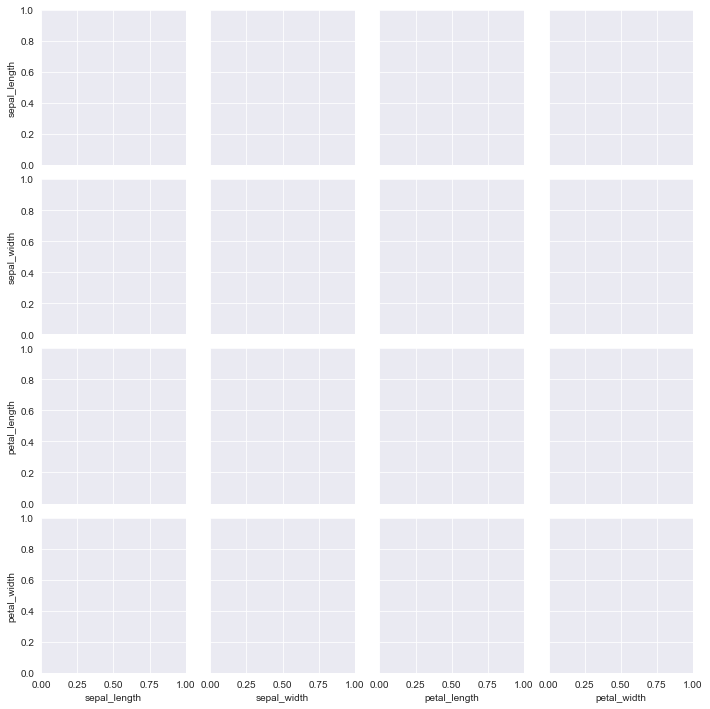

In [65]:
# Just the grid
sns.PairGrid(iris)

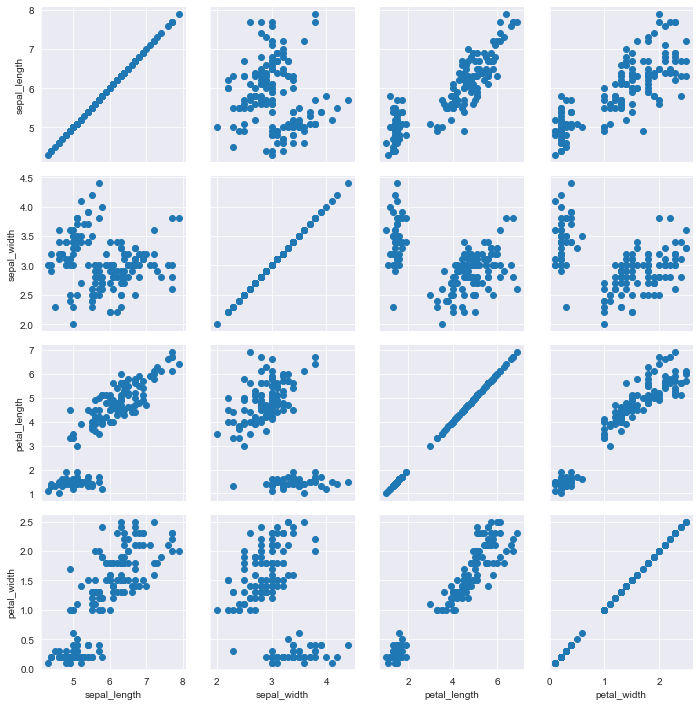

In [66]:
# map to the grid - much more control than pairplot
g = sns.PairGrid(iris)
g.map(plt.scatter)

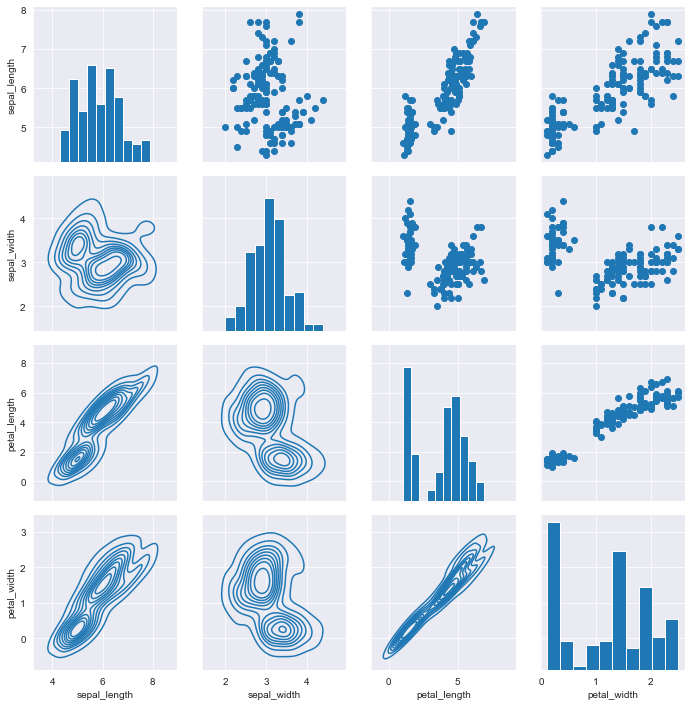

In [67]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### pairplot
Simpler version of PairGrid

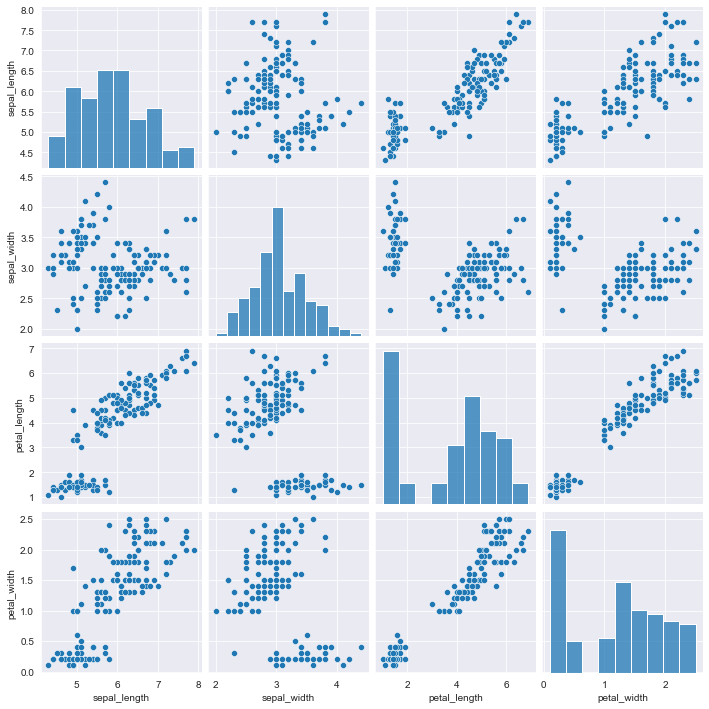

In [68]:
sns.pairplot(iris)

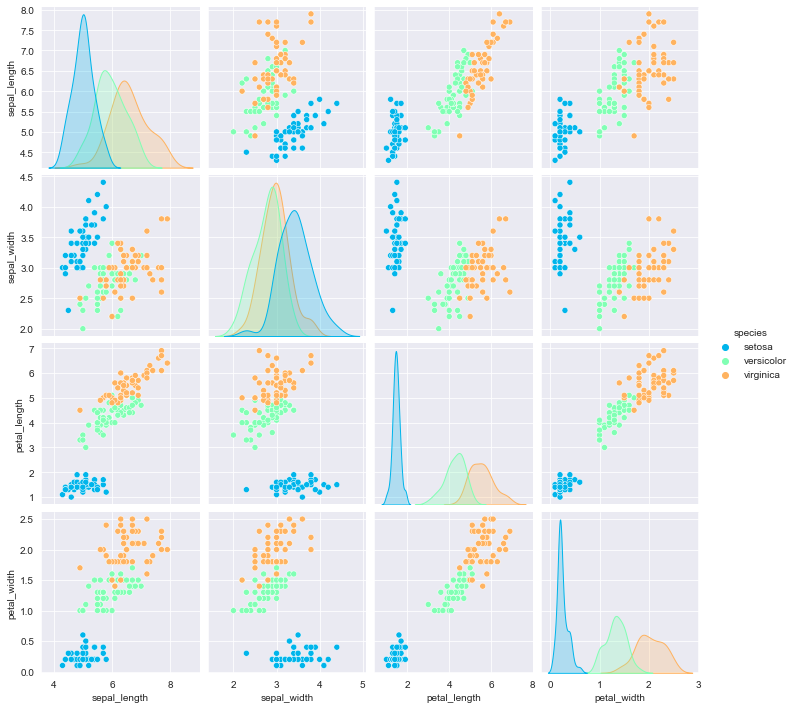

In [69]:
sns.pairplot(iris, hue='species', palette='rainbow')

### Facet Grid

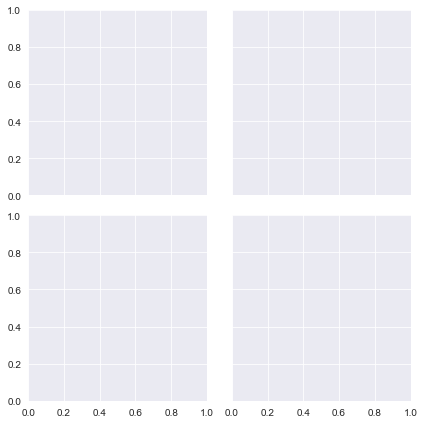

In [70]:
# Just the grid
g = sns.FacetGrid(tips, col='time', row='smoker')

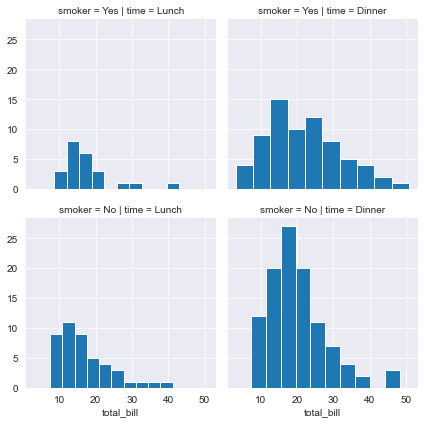

In [72]:
# Mapping a plot based on 2 categorical variables
g = sns.FacetGrid(tips, col='time', row='smoker')
g = g.map(plt.hist, 'total_bill')

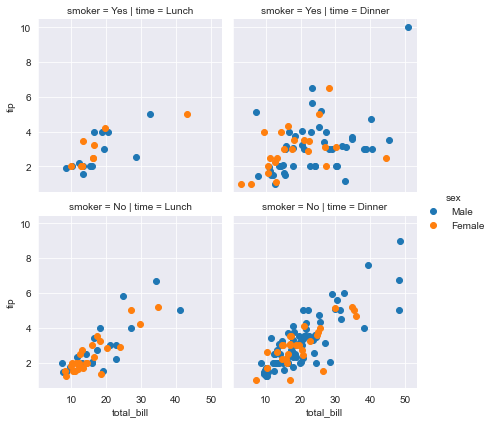

In [73]:
g = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
# notice how arguments that come after plt.scatter call
g = g.map(plt.scatter, 'total_bill', 'tip').add_legend()

### JointGrid
general version for jointplot() type grids

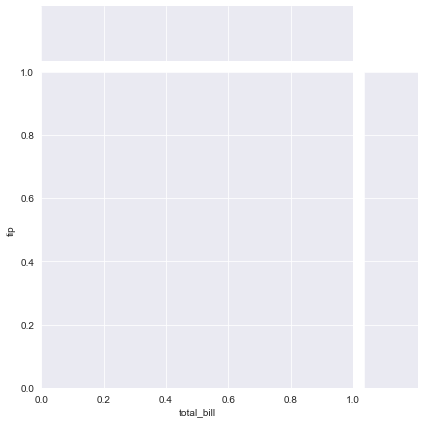

In [74]:
g = sns.JointGrid(x='total_bill', y='tip', data=tips)

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


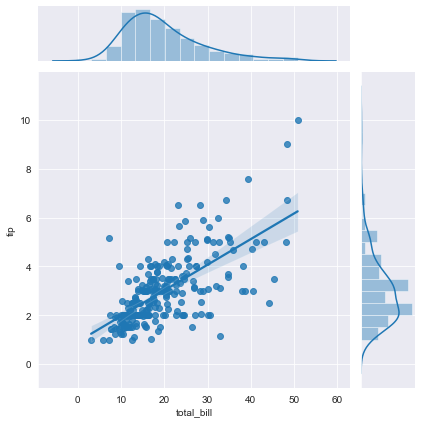

In [75]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

## Regression Plots

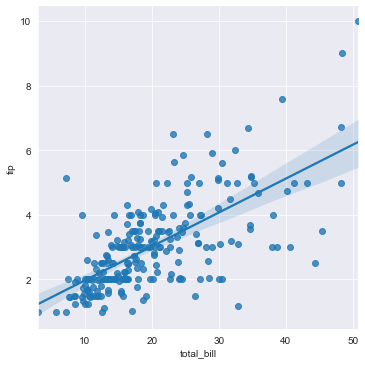

In [76]:
sns.lmplot(x='total_bill', y='tip', data=tips)

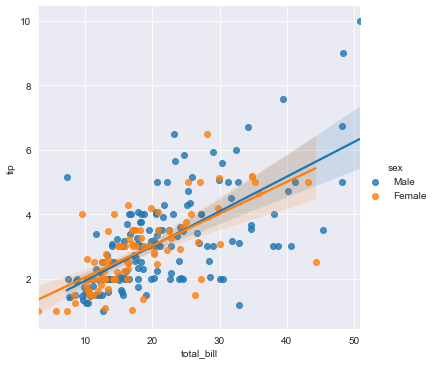

In [77]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

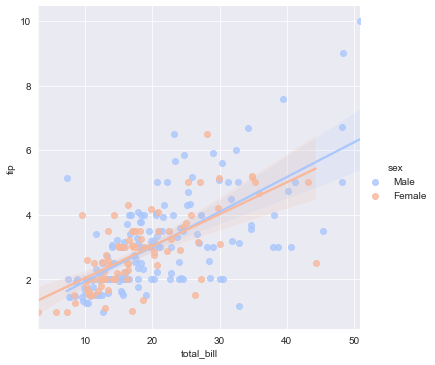

In [78]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

## Working with markers
lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

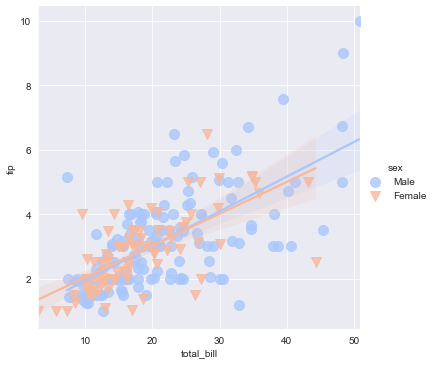

In [79]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

### Using a Grid
We can add more variable separation through columns anr rows

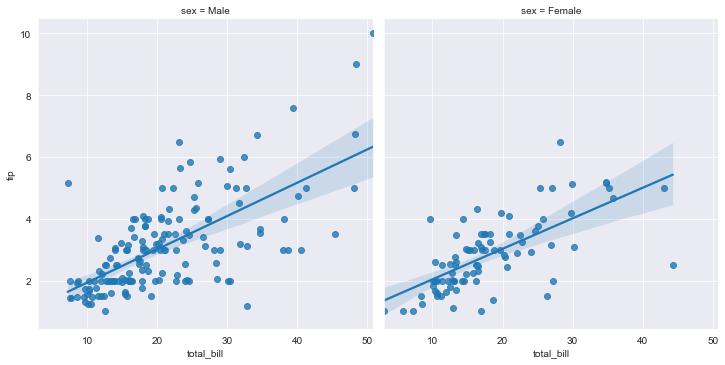

In [80]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')

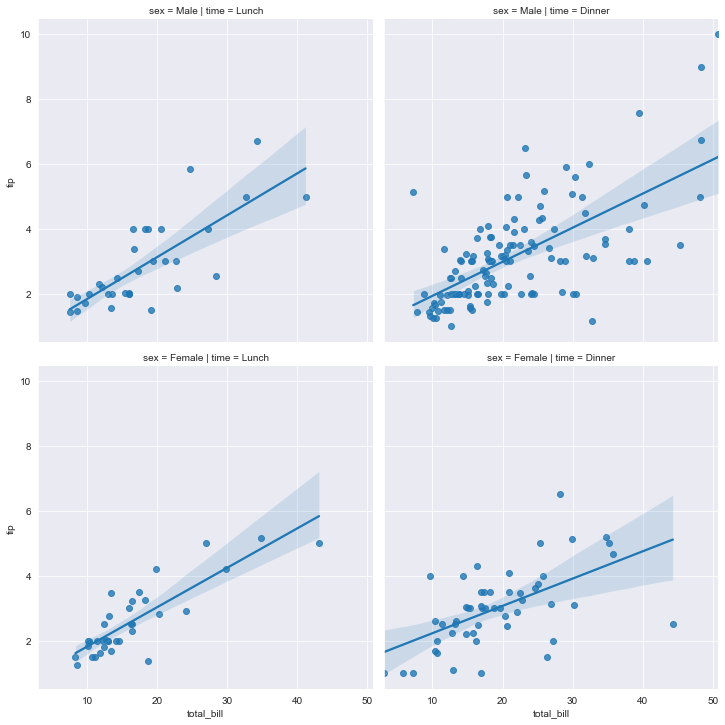

In [81]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

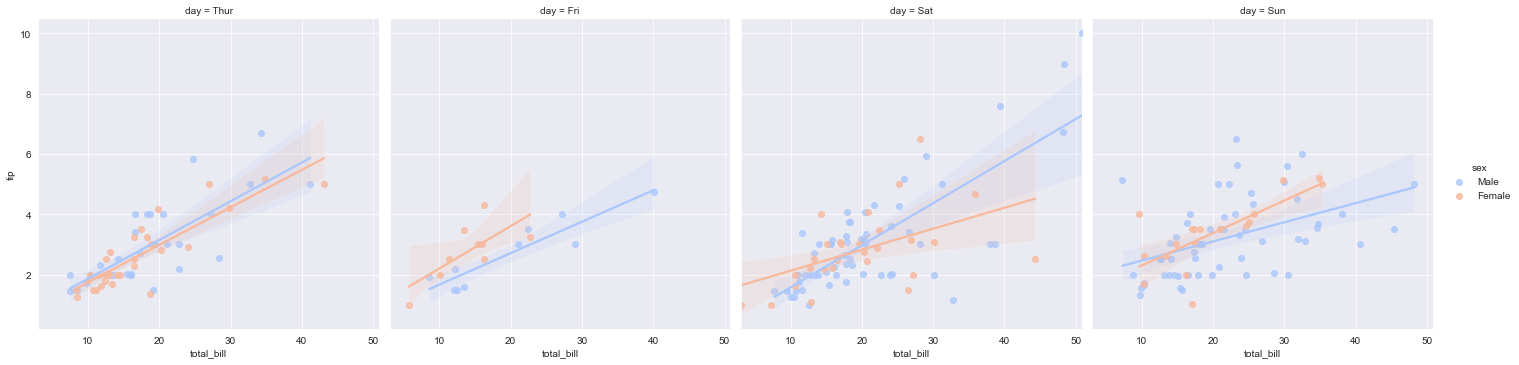

In [82]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

### Aspect and size
Seaborn figures can have their size and aspect ratio adjusted with the size and aspect parameters.

In [83]:
# Aspect ratio is ratio between height and width

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


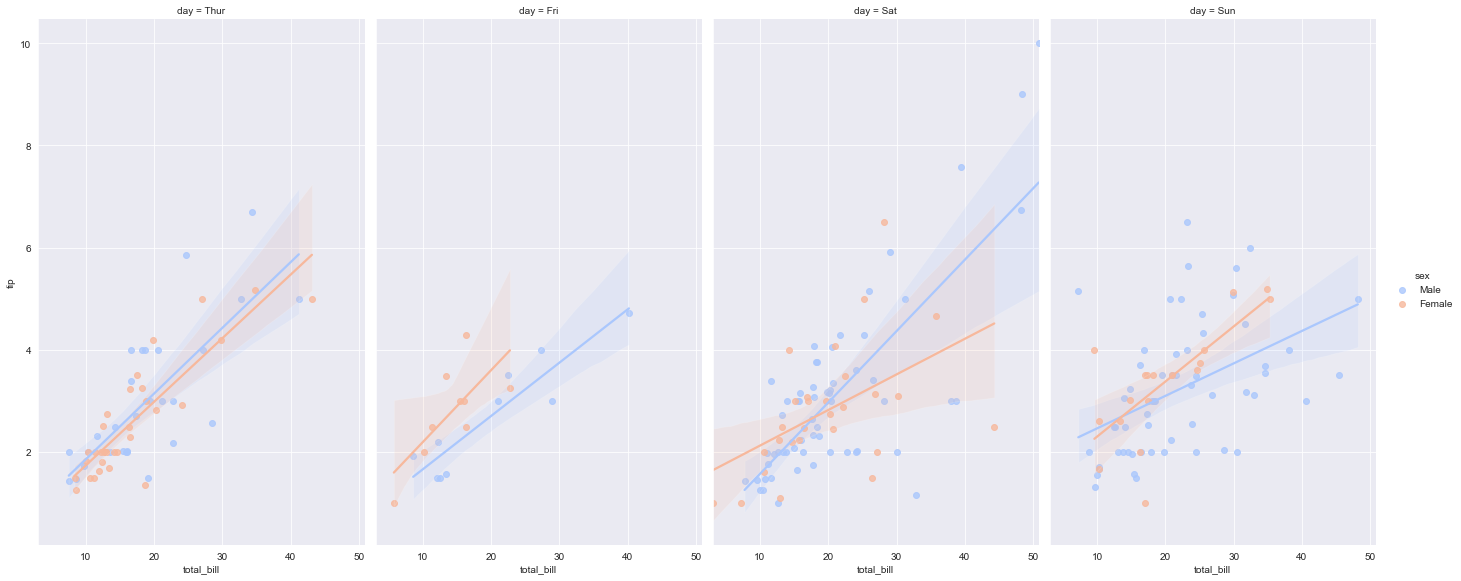

In [84]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8)

## Style and Color

## Styles
You can set particular styles

<AxesSubplot:xlabel='sex', ylabel='count'>

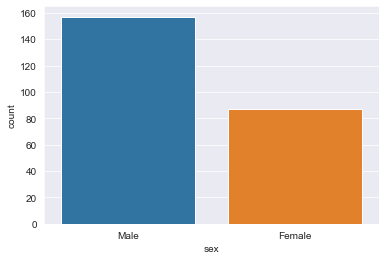

In [85]:
sns.countplot(x='sex', data=tips)

In [86]:
sns.set_style('white')

<AxesSubplot:xlabel='sex', ylabel='count'>

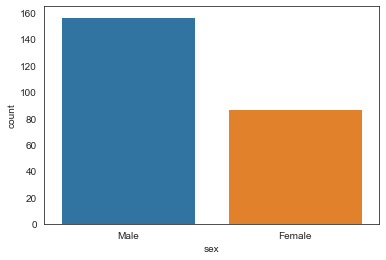

In [87]:
sns.countplot(x='sex', data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

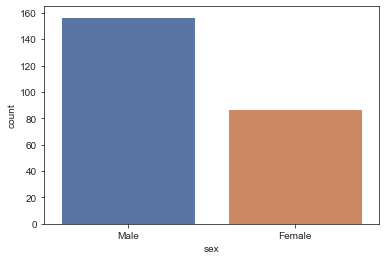

In [88]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

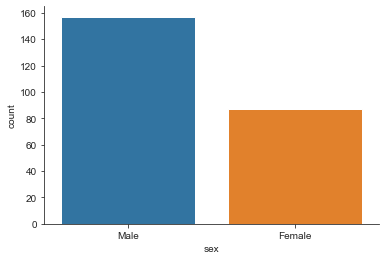

In [89]:
# Spine Removal
sns.countplot(x='sex',data=tips)
sns.despine()

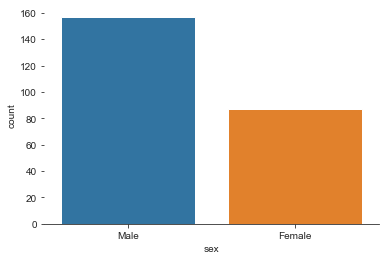

In [90]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

### Size and aspect
You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

<AxesSubplot:xlabel='sex', ylabel='count'>

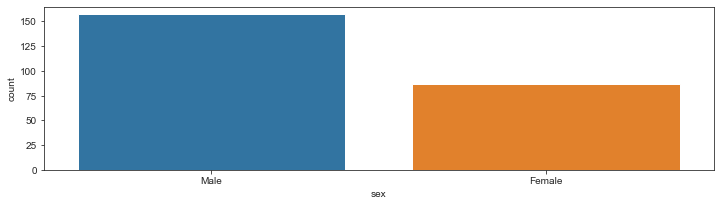

In [91]:
# non grid plot
plt.figure(figsize=(12, 3))
sns.countplot(x='sex', data=tips)

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


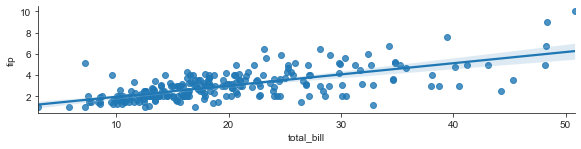

In [93]:
# Grid type plot
sns.lmplot(x='total_bill', y='tip', size=2, aspect=4, data=tips)

### Scale and Context
set_context() allows you to override default parameters

<AxesSubplot:xlabel='sex', ylabel='count'>

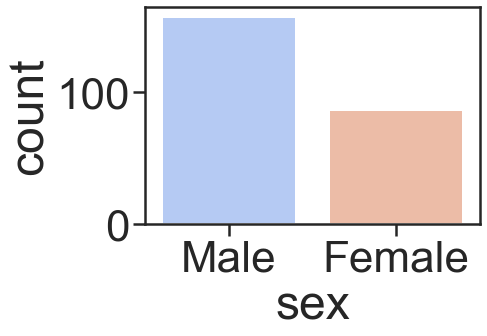

In [96]:
sns.set_context('poster', font_scale=2)
sns.countplot(x='sex', data=tips, palette='coolwarm')

In [98]:
# change font scale as well!